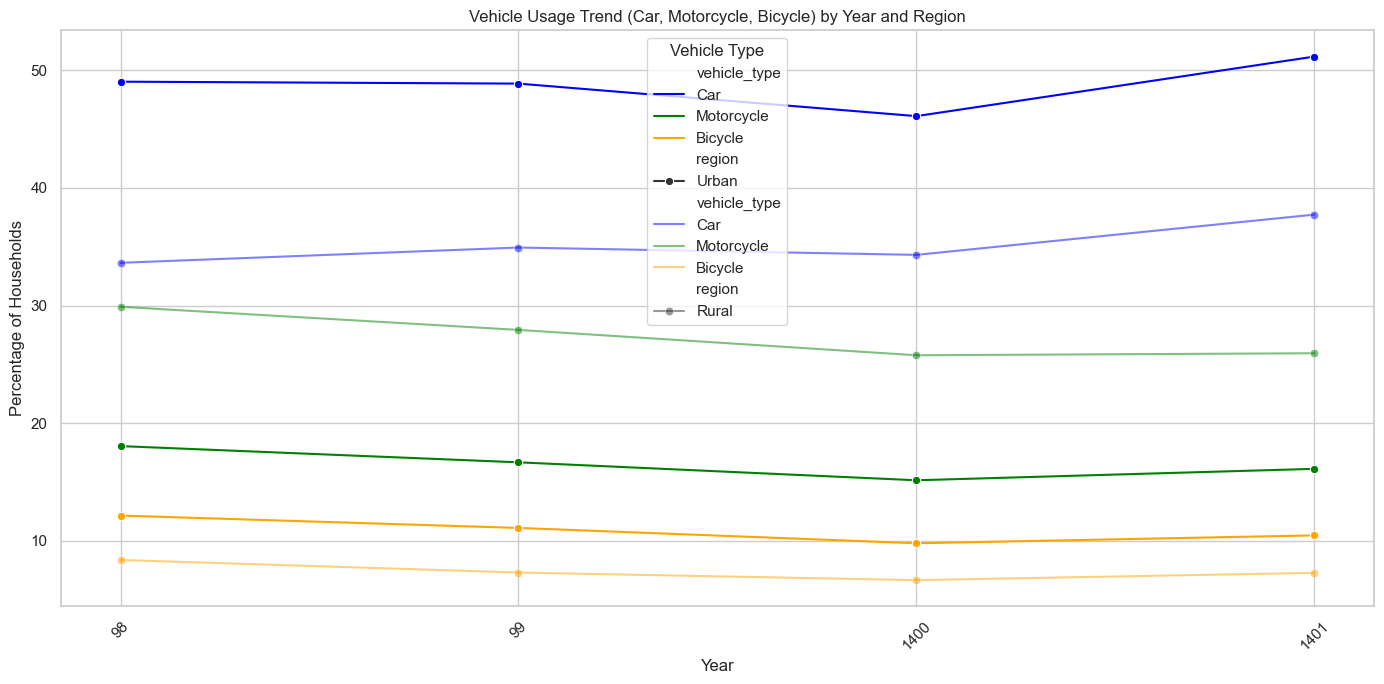

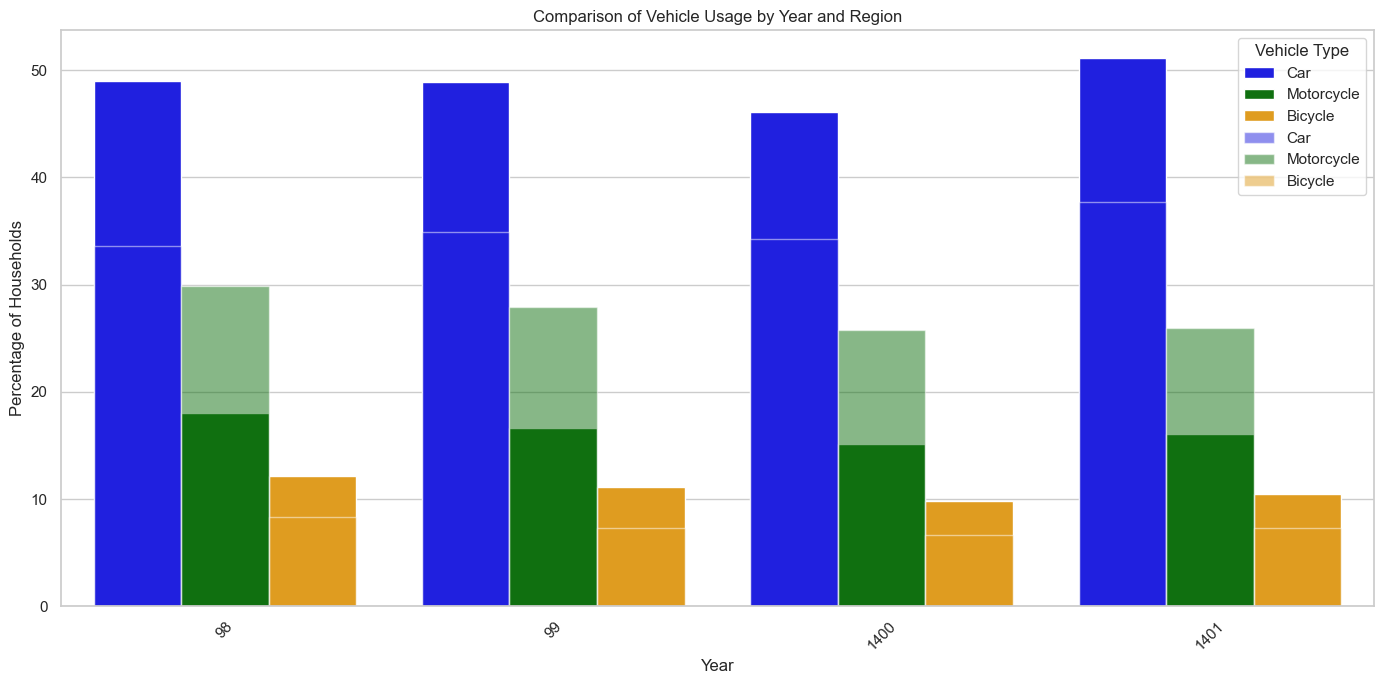

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = {
    "R98": "R98.xlsx",
    "R99": "R99.xlsx",
    "R1400": "R1400.xlsx",
    "R1401": "R1401.xlsx",
    "U98": "U98.xlsx",
    "U99": "U99.xlsx",
    "U1400": "U1400.xlsx",
    "U1401": "U1401.xlsx"
}

def calculate_vehicle_distribution(file_name, sheet_name):
    df = pd.read_excel(file_name, sheet_name=sheet_name)
    total_households = len(df)
    car_owners = df['vehicle'].sum()
    motorcycle_owners = df['motorcycle'].sum()
    bicycle_owners = df['bicycle'].sum()

    percent_car_owners = (car_owners / total_households) * 100
    percent_motorcycle_owners = (motorcycle_owners / total_households) * 100
    percent_bicycle_owners = (bicycle_owners / total_households) * 100

    return {
        "car_owners_percent": percent_car_owners,
        "motorcycle_owners_percent": percent_motorcycle_owners,
        "bicycle_owners_percent": percent_bicycle_owners
    }

results = {}

for year, file in files.items():
    sheet_name = year + "P2"
    results[year] = calculate_vehicle_distribution(file, sheet_name)

data = {
    "year": [],
    "region": [],
    "vehicle_type": [],
    "percentage": []
}

for year, data_points in results.items():
    region = "Rural" if year.startswith('R') else "Urban"
    year_short = year[1:] 
    data["year"].extend([year_short] * 3)
    data["region"].extend([region] * 3)
    data["vehicle_type"].extend(["Car", "Motorcycle", "Bicycle"])
    data["percentage"].extend([
        data_points["car_owners_percent"],
        data_points["motorcycle_owners_percent"],
        data_points["bicycle_owners_percent"]
    ])

df_plot = pd.DataFrame(data)
sns.set(style="whitegrid")
palette = {"Car": "blue", "Motorcycle": "green", "Bicycle": "orange"}
line_style = {"Urban": 1, "Rural": 0.5} 
plt.figure(figsize=(14, 7))
for region, alpha in line_style.items():
    sns.lineplot(
        x="year", y="percentage", hue="vehicle_type", style="region", 
        data=df_plot[df_plot['region'] == region], 
        palette=palette, alpha=alpha, markers=True, dashes=False
    )

plt.title("Vehicle Usage Trend (Car, Motorcycle, Bicycle) by Year and Region")
plt.ylabel("Percentage of Households")
plt.xlabel("Year")
plt.legend(title="Vehicle Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
for region, alpha in line_style.items():
    sns.barplot(
        x="year", y="percentage", hue="vehicle_type", 
        data=df_plot[df_plot['region'] == region], 
        palette=palette, alpha=alpha, 
        dodge=True  
    )

plt.title("Comparison of Vehicle Usage by Year and Region")
plt.ylabel("Percentage of Households")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()
